### **Media Prediction EDA**

**Taxonomy**

1.1 MediaDive taxonomic diversity

**Enzymes**

2.1 taxa2ec enzyme diversity

2.2 media2ec enzyme diversity

2.3 Comparison between taxa2ec and media2ec

2.4 Comparison of taxa2ec source overlap

2.5 Heatmap

**Cofactors**

3.1 ec2metals (taxa2ec)

3.2 ec2metals (media2ec)

3.3 ec2metals (subset of isolates)

3.4 Comparison of ec2metals (all cofactors)

3.5 Compoarison of ec2metals (metal cofactors)

*All dataframes loaded can be constructed using data.ipynb, "Comparison" => normalized, ...*

In [50]:
import pandas as pd
import os
DATA_DIR = '~/Desktop/code/data/'

### Taxonomy

[1.1] MediaDive taxonomic diversity

In [51]:
md_df = pd.read_csv(os.path.join(DATA_DIR,"mediadive","mediadive-all.csv"), sep = ';')

import plotly.express as px

n = 50 #number of species we wanna show

# Plot the occurrence of enzymes across all of our selected taxa 
fig = px.bar(
    data_frame = md_df.value_counts('species').head(n).reset_index(),
    x="species",
    y="count",
    
    title="Species abundance in MediaDive (by strain count, top %i)" %n
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.update_yaxes(title='', visible=True, showticklabels=True)
fig.show()

### Enzymes

[2.1] taxa2ec enzyme diversity

In [52]:
data = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)
ecs = data.copy()

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = ecs.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

taxa_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(taxa_enzyme_counts)

import plotly.express as px

# Plot the occurrence of enzymes across all of our selected taxa 
fig2 = px.bar(taxa_enzyme_counts, x="Class", y="Total Count")
fig2.show()


  Group            Class  Total Count
0     1  Oxidoreductases       619571
1     2     Transferases      1455538
2     3       Hydrolases       951266
3     4           Lyases       426622
4     5       Isomerases       310414
5     6          Ligases       480922
6     7     Translocases       125212


[2.2] media2ec enzyme diversity

In [53]:
data = pd.read_csv(os.path.join(DATA_DIR, 'media2ec-explode.csv'), low_memory=False)
ecs = data.copy()

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = ecs.value_counts("ec_KEGG").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df["ec_KEGG"].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']

# Create filler rows for classes which have 0 counts (manual step) ... no group 7 translocases in dataset
filler_dict = {'Group':[7], 'Total Count':[0]}
filler = pd.DataFrame(filler_dict)
grouped_df = pd.concat([grouped_df,filler], ignore_index = True).copy()
grouped_df['Group'] = grouped_df['Group'].astype(int)
grouped_df = grouped_df.sort_values('Group')
grouped_df.reset_index()

# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

media_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(media_enzyme_counts)

import plotly.express as px

# Plot the occurrence of enzymes across all of our selected media 
fig3 = px.bar(media_enzyme_counts, x="Class", y="Total Count")
fig3.show()


   Group            Class  Total Count
0      1  Oxidoreductases        21628
1      2     Transferases         3021
2      3       Hydrolases         1139
3      4           Lyases           17
4      5       Isomerases            2
5      6          Ligases          358
6      7     Translocases            0


[2.3] Comparison of enzyme diversity

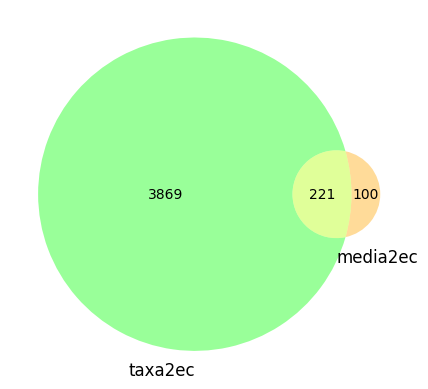

In [54]:
# Convert taxa2ec info to list
taxa2ec_df = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)
taxa2ec_list = taxa2ec_df['ec'].to_list()

# Convert kegg2ec info to list
media2ec_df = pd.read_csv(os.path.join(DATA_DIR, 'media2ec-explode.csv'), low_memory=False)
media2ec_list = media2ec_df['ec_KEGG'].to_list()

from matplotlib import pyplot as plt
from matplotlib_venn import venn2

venn2(
    subsets=[
        set(taxa2ec_list),
        set(media2ec_list)
    ],
    set_labels=[
        "taxa2ec",
        "media2ec"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

In [55]:
# Make a list of the common ec's between these two lists
set1 = set(taxa2ec_list)
set2 = set(media2ec_list)
common = list(set1.intersection(set2))

# Put the list into a dataframe
dict = {'ec': common}
ecs = pd.DataFrame(dict)

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = ecs.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']

# Create filler rows for classes which have 0 counts (manual step)
filler_dict = {'Group':[5,7], 'Total Count':[0,0]}
filler = pd.DataFrame(filler_dict)
grouped_df = pd.concat([grouped_df,filler], ignore_index = True).copy()
grouped_df['Group'] = grouped_df['Group'].astype(int)
grouped_df = grouped_df.sort_values('Group')
grouped_df.reset_index()

# Adding information on the type of enzymes (NOTE: no enzymes from class 5 or 7, so removed these labels...could alternatively have a place holder above)
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(enzyme_counts)

import plotly.express as px

# Plot the occurrence of enzymes across our overlapping dataset
fig4 = px.bar(enzyme_counts, x="Class", y="Total Count") #, title="Overlap of enzyme classes between taxa and media:"
fig4.show()

   Group            Class  Total Count
0      1  Oxidoreductases          143
1      2     Transferases           50
2      3       Hydrolases           22
3      4           Lyases            4
5      5       Isomerases            0
4      6          Ligases            2
6      7     Translocases            0


Normalized barplots

In [125]:
# Dataframes to show enzyme class proportions relative to each dataset

df1 = taxa_enzyme_counts.copy() 
sum1 = df1['Total Count'].sum(axis=0)
df1['Taxa_Proportion'] = df1['Total Count'].div(sum1)

df2 = media_enzyme_counts.copy() 
sum2 = df2['Total Count'].sum(axis=0)
df2['Media_Proportion'] = df2['Total Count'].div(sum2)

df3 = enzyme_counts.copy() 
sum3 = df3['Total Count'].sum(axis=0)
df3['Overlap_Proportion'] = df3['Total Count'].div(sum3)


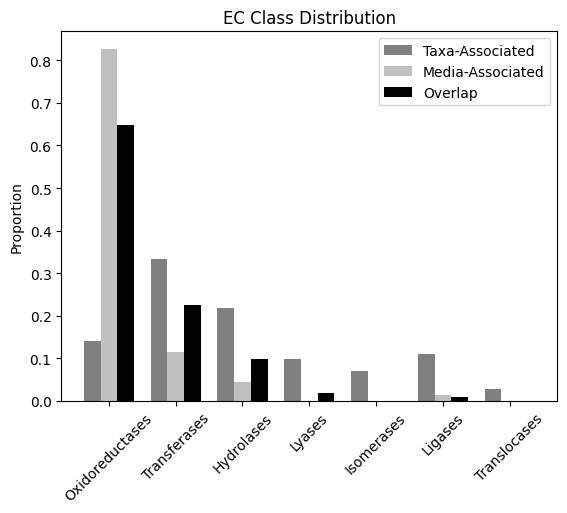

In [126]:
import numpy as np 
import matplotlib.pyplot as plt 
  
N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Taxa_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'grey') 
  
yvals = df2['Media_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='silver') 
  
zvals = df3['Overlap_Proportion']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black') 
  
#plt.xlabel("Enzyme Class") 
plt.ylabel("Proportion") 
plt.title("EC Class Distribution") 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.legend( (bar1, bar2, bar3), ('Taxa-Associated', 'Media-Associated', 'Overlap') ) 
plt.show() 

In [68]:

#EC 1: Oxidoreductases – Enzymes that catalyze oxidation-reduction reactions.
#EC 2: Transferases – Enzymes that transfer a functional group (e.g., a methyl or phosphate group).
#EC 3: Hydrolases – Enzymes that catalyze the hydrolysis of various bonds.
#EC 4: Lyases – Enzymes that break various chemical bonds by means other than hydrolysis/oxidation, often forming a new double-bond or ring structure.
#EC 5: Isomerases – Enzymes that catalyze the transfer of groups within molecules to yield isomeric forms.
#EC 6: Ligases – Enzymes that join two molecules together, typically using ATP.
#EC 7: Translocases – Enzymes that catalyze the movement of ions or molecules across membranes or their separation within membranes.

[2.4] Comparison of ec sources for taxa2ec

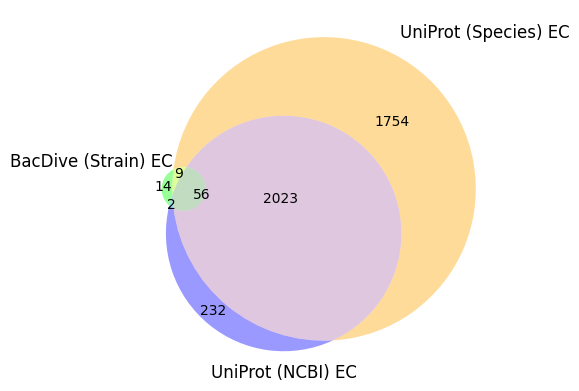

In [61]:
data = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

substring1 = 'bacdive'
filter1 = data['source'].str.contains(substring1) # create filter
bacdive_df = data[filter1].copy()

substring2 = 'uniprot'
filter2 = data['source'].str.contains(substring2)
uniprot_df = data[filter2].copy()

substring3 = 'ncbi'
filter3 = data['source'].str.contains(substring3)
ncbi_df = data[filter3].copy()

from matplotlib import pyplot as plt
from matplotlib_venn import venn3

venn3(
    subsets=[
        set(bacdive_df["ec"]),
        set(uniprot_df["ec"]),
        set(ncbi_df["ec"])
    ],
    set_labels=[
        "BacDive (Strain) EC",
        "UniProt (Species) EC",
        "UniProt (NCBI) EC"
    ],
    set_colors=[
        "lime",
        "orange",
        "blue"
    ]
)

# BacDive incomplete parsing of ECs? Or really just that small of a dataset? (using set function removes duplicates)

[2.5] Heatmap

In [62]:
data = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

data_heatmap = data[["media_id", "taxon_id"]].drop_duplicates()
data_heatmap["count"] = 1
data_heatmap = data_heatmap.pivot(index="taxon_id", columns="media_id", values="count")

import plotly.express as px

#px.imshow(data_heatmap, width=1500, height=1500)

### Cofactors

[3.1] ec2metals (taxa2ec)

In [83]:
# Load cofactor info and remove entries w/ non-specific EC numbers (i.e. 1.1.1.-, 1.1.-.-, etc.)
cofactors = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa2ec.csv"))

substring = '-'
filter = cofactors['Query EC'].str.contains(substring)
cofactors = cofactors[~filter]

import plotly.express as px

data = cofactors.copy()
fig = px.bar(
    data_frame = data.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="taxa2ec cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

[3.2] ec2metals (media2ec)

In [84]:
# Load cofactor info and remove entries w/ non-specific EC numbers (i.e. 1.1.1.-, 1.1.-.-, etc.)
cofactors = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-media2ec.csv"))

substring = '-'
filter = cofactors['Query EC'].str.contains(substring)
cofactors = cofactors[~filter]

import plotly.express as px

data = cofactors.copy()
fig = px.bar(
    data_frame = data.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="media2ec cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

[3.3] ec2metals (subset of isolates)

In [85]:
# Load cofactor info and remove entries w/ non-specific EC numbers (i.e. 1.1.1.-, 1.1.-.-, etc.)
cofactors = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-subset.csv"))

substring = '-'
filter = cofactors['Query EC'].str.contains(substring)
cofactors = cofactors[~filter]

import plotly.express as px

data = cofactors.copy()
fig = px.bar(
    data_frame = data.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="Isolate subset cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

[3.4] Cofactor comparison (all)

In [183]:
# Load dataframes
taxa2ec = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa2ec.csv"))
media2ec = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-media2ec.csv"))
subset = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-subset.csv"))

# Filter non-specific EC numbers
substring = '-'
filter1 = taxa2ec['Query EC'].str.contains(substring)
filter2 = media2ec['Query EC'].str.contains(substring)
filter3 = subset['Query EC'].str.contains(substring)

taxa2ec = taxa2ec[~filter1]
media2ec = media2ec[~filter2]
subset = subset[~filter3]

#Create, merge, format counts 
cf_df1 = taxa2ec["CofactorFinal"].value_counts().reset_index()
sum1 = cf_df1["count"].sum(axis=0)
cf_df1['Taxa_Proportion'] = cf_df1['count'].div(sum1)

cf_df2 = media2ec["CofactorFinal"].value_counts().reset_index()
sum2 = cf_df2["count"].sum(axis=0)
cf_df2['Media_Proportion'] = cf_df2['count'].div(sum2)

cf_df3 = subset["CofactorFinal"].value_counts().reset_index()
sum3 = cf_df3["count"].sum(axis=0)
cf_df3['Subset_Proportion'] = cf_df3['count'].div(sum3)

# Merging counts
cf_df1 = cf_df1.rename(columns={"count": "count1"})
cf_df2 = cf_df2.rename(columns={"count": "count2"})
cf_df3 = cf_df3.rename(columns={"count": "count3"})

cf_df = pd.merge(left=cf_df1, right=cf_df2, on="CofactorFinal", how="left")
cf_df = pd.merge(left=cf_df, right=cf_df3, on="CofactorFinal", how="left")
cf_df = cf_df.fillna(0)

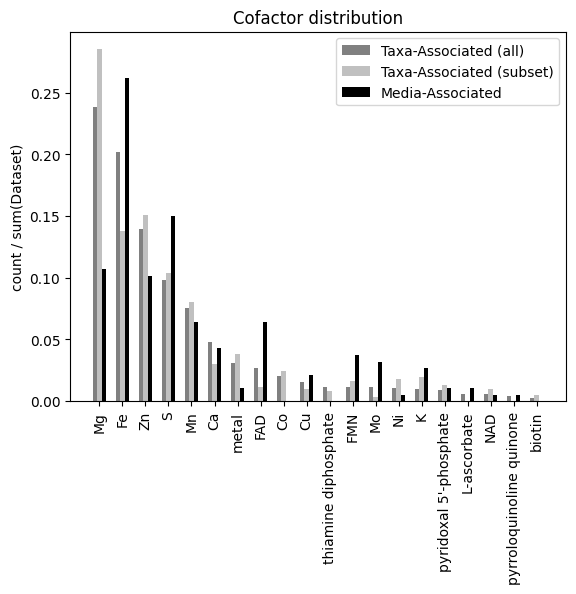

In [164]:
import numpy as np 
import matplotlib.pyplot as plt 

cf_df = cf_df.head(20) # Subset full dataframe; usual length is ~45 cofactors
N = 20

ind = np.arange(N)  
width = 0.2
  
xvals = cf_df['Taxa_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'grey') 
  
yvals = cf_df['Subset_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='silver') 
  
zvals = cf_df['Media_Proportion']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black') 
  
#plt.xlabel("Cofactor") 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution") 
  
plt.xticks(ind+width,cf_df["CofactorFinal"],rotation=90) 
plt.legend( (bar1, bar2, bar3), ('Taxa-Associated (all)', 'Taxa-Associated (subset)', 'Media-Associated') ) 
plt.show() 

[3.5] Cofactor comparison (metals)

In [193]:
# Subset with ONLY metal cofactors:
metals = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-list.csv"))
metals_list = metals['Metals'].to_list()
mask = cf_df['CofactorFinal'].isin(metals_list)
metal_cf = cf_df[mask].reset_index()

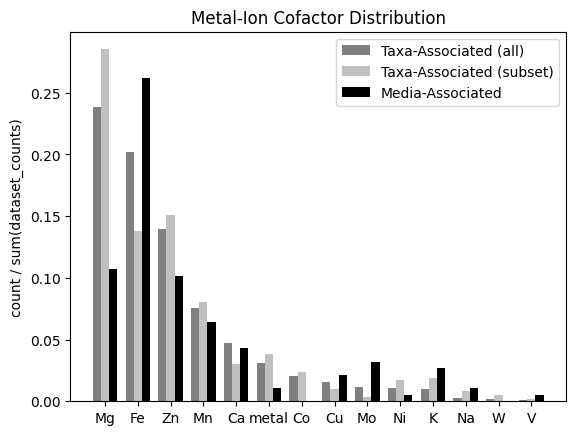

In [196]:
import numpy as np 
import matplotlib.pyplot as plt 

N = 14

ind = np.arange(N)  
width = 0.25
  
xvals = metal_cf['Taxa_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'grey') 
  
yvals = metal_cf['Subset_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='silver') 
  
zvals = metal_cf['Media_Proportion']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black') 
  
#plt.xlabel("Cofactor") 
plt.ylabel("count / sum(dataset_counts)") 
plt.title("Metal-Ion Cofactor Distribution") 
  
plt.xticks(ind+width,metal_cf["CofactorFinal"],rotation=0) 
plt.legend( (bar1, bar2, bar3), ('Taxa-Associated (all)', 'Taxa-Associated (subset)', 'Media-Associated') ) 
plt.show() 

**To-do:**

circos/other co-occurrence plots

figure on workflow of databases to machine learning